In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time


import matplotlib.pyplot as plt
%matplotlib inline

# Recurrent Neural Networks LSTM and GRU 

Using tensorflow libray. Example using MNIST dataset of handwritten digits http://yann.lecun.com/exdb/mnist/).

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

In [10]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [112]:
tf.reset_default_graph()
sess = tf.Session()

# Recurrent Neural Networks

In [134]:
from IPython.display import Image

Image(url="https://cdn-images-1.medium.com/max/1600/1*V2W4TCmTj2h1CE7I-DngPw.png")

In [113]:
def RNN(x_, w, b):
    x_ = tf.transpose(x_, [1, 0, 2])
    x_ = tf.reshape(x_, [-1, n_inputs])
    
    
    hidden = tf.matmul(x_, w['hidden']) + b['hidden']
    hidden = tf.nn.relu(hidden)
    hidden = tf.split(hidden, n_steps, 0)
    rnn_layers = [tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.GRUCell(n_hidden), output_keep_prob=keep_prob) for _ in range(n_layers)]
    rnn_layers = tf.contrib.rnn.MultiRNNCell(rnn_layers)
    outputs, _ = tf.contrib.rnn.static_rnn(rnn_layers, hidden, dtype=tf.float32)
    
    rnn_output = outputs[-1]
    return tf.matmul(rnn_output, w['out']) + b['out']
    
    

In [114]:
learning_rate = 1e-3

batch_size = 128

n_inputs = 28
n_steps = 28
n_hidden = 128
n_classes = 10
n_layers = 2

test_inputs = mnist.test.images[:batch_size].reshape((-1, n_steps, n_inputs))
test_labels = mnist.test.labels[:batch_size]

x = tf.placeholder(dtype=tf.float32, shape=[None, n_steps, n_inputs])
y = tf.placeholder(dtype=tf.float32, shape=[None, n_classes])
keep_prob = tf.placeholder(dtype=tf.float32)

w = {
    'hidden':tf.Variable(tf.random_normal([n_inputs, n_hidden])),
    'out'   : tf.Variable(tf.random_normal([n_hidden, n_classes]))
    
}
b = {
    'hidden' : tf.Variable(tf.random_normal([n_hidden])),
    'out'    : tf.Variable(tf.random_normal([n_classes]))
}


In [115]:
logits = RNN(x, w, b)
softmax = tf.nn.softmax(logits)

# Let's Optimize

In [133]:
from IPython.display import Image
Image(url="https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/img/bdd8f1f362889583.png")

In [116]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate, beta1=0.90, beta2=0.99).minimize(loss)

prediction = tf.equal(tf.argmax(softmax, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [117]:
init = tf.global_variables_initializer()
sess.run(init)

In [118]:
import time
train_loss = []
train_acc = []
start = time.time()
epochs = 5000
print('Initializing Training')
try:
    for epoch in range(epochs):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        x_batch = np.reshape(x_batch, (batch_size, n_steps, n_inputs))
        cost, acc, _ = sess.run([loss, accuracy, optimizer], feed_dict={x: x_batch,
                                                                       y: y_batch,
                                                                       keep_prob:0.8})
        train_loss.append(cost)
        train_acc.append(acc)
        if epoch % 100 == 0:
            print('EPOCH: {}'.format(epoch))
            print('Loss : {} and Accuracy: {}'.format(cost, 100 * acc))
                        
except KeyboardInterrupt:
    print('Training interrupted after:{}'.format(time.time() - start))
acc_te, loss_te = sess.run([accuracy, loss], feed_dict={x:test_inputs, y:test_labels, keep_prob:1.0})
print('Testing Loss: {} and Accuracy: {}'.format(loss_te, acc_te))    


Initializing Training
EPOCH: 0
Loss : 11.4624662399292 and Accuracy: 8.59375
EPOCH: 100
Loss : 0.5268256664276123 and Accuracy: 82.03125
EPOCH: 200
Loss : 0.23446272313594818 and Accuracy: 92.96875
EPOCH: 300
Loss : 0.15800151228904724 and Accuracy: 94.53125
EPOCH: 400
Loss : 0.18906140327453613 and Accuracy: 94.53125
EPOCH: 500
Loss : 0.06856535375118256 and Accuracy: 97.65625
EPOCH: 600
Loss : 0.04374491050839424 and Accuracy: 99.21875
EPOCH: 700
Loss : 0.23458731174468994 and Accuracy: 96.09375
EPOCH: 800
Loss : 0.2150009125471115 and Accuracy: 93.75
EPOCH: 900
Loss : 0.08172964304685593 and Accuracy: 97.65625
EPOCH: 1000
Loss : 0.16209298372268677 and Accuracy: 96.875
EPOCH: 1100
Loss : 0.01662084460258484 and Accuracy: 99.21875
EPOCH: 1200
Loss : 0.10869061946868896 and Accuracy: 98.4375
EPOCH: 1300
Loss : 0.0933050662279129 and Accuracy: 96.875
EPOCH: 1400
Loss : 0.01637428067624569 and Accuracy: 99.21875
EPOCH: 1500
Loss : 0.1085675060749054 and Accuracy: 96.09375
EPOCH: 1600
Lo

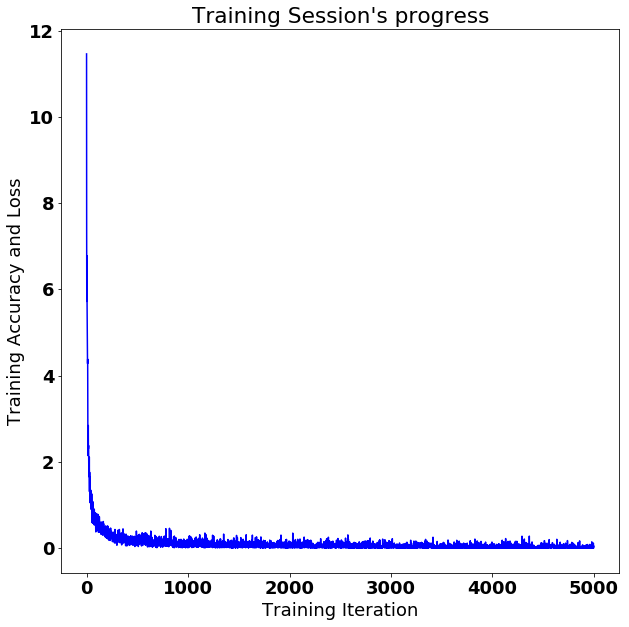

In [125]:
font = {
    'family' : 'Bitstream Vera Sans',
    'weight' : 'bold',
    'size'   : 18
}

plt.rc('font', **font)
width = 10
height = 10
plt.figure(figsize=(width, height))

plt.title("Training Session's progress")
plt.plot(train_loss, 'b', label='Train Loss')
#plt.plot(train_acc_, 'r-', label='Train_accuracy')
plt.xlabel("Training Iteration")
plt.ylabel("Training Accuracy and Loss")
plt.show()

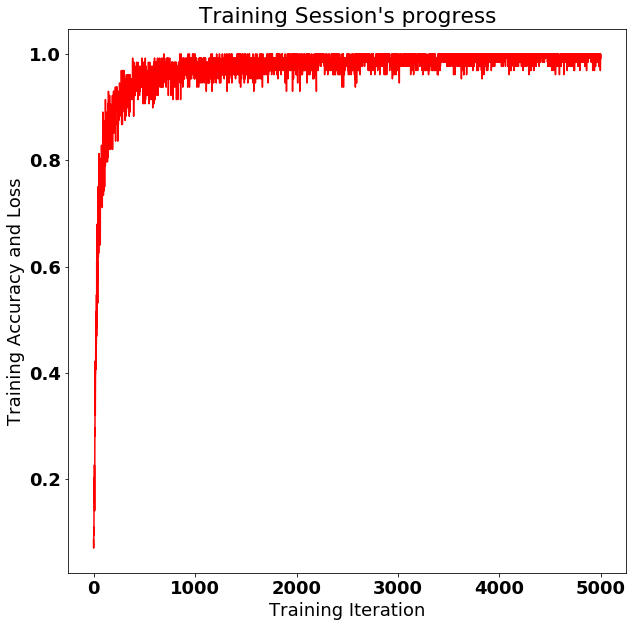

In [126]:
font = {
    'family' : 'Bitstream Vera Sans',
    'weight' : 'bold',
    'size'   : 18
}
#train_acc_ = [tr/100 for tr in train_acc]
plt.rc('font', **font)
width = 10
height = 10
plt.figure(figsize=(width, height))

plt.title("Training Session's progress")
#plt.plot(train_loss, 'b', label='Train Loss')
plt.plot(train_acc, 'r-', label='Train_accuracy')
plt.xlabel("Training Iteration")
plt.ylabel("Training Accuracy and Loss")
plt.show()